# Introduction to PyTorch

In this tutorial, we finally start to take steps towards deep learning by learning some of the basics of PyTorch. Unlike classical ML approaches done thus far, deep learning tends to be *extremely* computationally intensive. Because of this, and the fact that deep learning is more hands on and modular than other "off the shelf" ML algorithms like those in sklearn, deep learning requires learning a whole new set of frameworks. As of 2022, the dominant deep learning frameworks are PyTorch and TensorFlow. PyTorch has traditionally been favored by researchers because it's more modular and easier to learn, while Tensorflow has traditionally been favored more in industry settings. In the past couple of years though, PyTorch has made headway into industry settings as well, and (along with the new upstart framework JAX) appears to be slowly displacing TensorFlow in industry as well. It's for these reasons that I've decided to focus on PyTorch as our framework for introducing deep learning in these tutorials.

If you haven't yet, you'll want to start by installing PyTorch [here](https://pytorch.org/). The specifics will depend on your OS, what python environment you're using, and whether you have an NVIDIA GPU with Cuda compatibility on your system. Note that PyTorch is quite a large package install, especially the GPU versions.

In many ways, we can use PyTorch the same way that we use NumPy. Many of the commands are the same (but unfortunately many are not, and I'll try to point out the differences where they arise). To import PyTorch, we call `import torch`. We also set a seed by calling `torch.manual_seed(seed)`. We'll also go ahead and import numpy and matplotlib as well for later.

In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(123)

## Tensors

The fundamental data structure in pytorch is the **tensor**, which functions more or less the same as the numpy array. The term **tensor** comes from math and physics, where ([roughly speaking](https://en.wikipedia.org/wiki/Tensor)) it refers to a an array with arbitrarily many dimensions. A one dimensional array is often called a **vector**. A two dimensional array is often called a **matrix**. And any higher dimensional array is often called a *tensor*. For practical purposes though, you'll lose little to nothing by thinking of an array and a tensor as the same thing, just with different names.

Defining a tensor in pytorch is pretty similar to defining an array in numpy.

In [5]:
x = [0.8, 1, 9.2, 10001, -4, 0]
x_numpy = np.array(x)
x_torch = torch.tensor(x)
x, x_numpy, x_torch

([0.8, 1, 9.2, 10001, -4, 0],
 array([ 8.0000e-01,  1.0000e+00,  9.2000e+00,  1.0001e+04, -4.0000e+00,
         0.0000e+00]),
 tensor([ 8.0000e-01,  1.0000e+00,  9.2000e+00,  1.0001e+04, -4.0000e+00,
          0.0000e+00]))

Many of the usual operations from numpy carry over straight forwardly, including the rules for arithmetic, broadcasting, and indexing.

In [8]:
x = torch.tensor([1, 1, 1])
y = torch.tensor([[1, 2, 3], [4, 5, 6]])
x.shape, y.shape

(torch.Size([3]), torch.Size([2, 3]))

In [12]:
x + 5

tensor([6, 6, 6])

In [13]:
x * 2

tensor([2, 2, 2])

In [14]:
y + x

tensor([[2, 3, 4],
        [5, 6, 7]])

In [34]:
x[0]

tensor(1)

In [15]:
x[x != 1]

tensor([], dtype=torch.int64)

In [16]:
y[y > 3]

tensor([4, 5, 6])

In [18]:
y, y.T

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 4],
         [2, 5],
         [3, 6]]))

Mathematical functions are also more or less the same as with numpy. When in doubt, try it and see if it works. If it doesn't, google how to do it in pytorch.

In [35]:
torch.exp(x)

tensor([2.7183, 2.7183, 2.7183])

In [36]:
torch.sin(x)

tensor([0.8415, 0.8415, 0.8415])

In [37]:
torch.log(2 * x)

tensor([0.6931, 0.6931, 0.6931])

The usual functions for linear algebra operations carry over as well. Same for the random functions, except they're not part of a `random` submodule like in numpy. Note that `torch.dot` can't be used for matrix multiplies like `numpy.dot` can, so instead you have to use `torch.matmul` or the `@` operator.

In [20]:
A = torch.rand(3, 3)
A.shape, A

(torch.Size([3, 3]),
 tensor([[0.7264, 0.3153, 0.6871],
         [0.0756, 0.1966, 0.3164],
         [0.4017, 0.1186, 0.8274]]))

In [25]:
A @ A, torch.matmul(A, A)

(tensor([[0.8276, 0.3725, 1.1674],
         [0.1969, 0.1000, 0.3760],
         [0.6332, 0.2481, 0.9981]]),
 tensor([[0.8276, 0.3725, 1.1674],
         [0.1969, 0.1000, 0.3760],
         [0.6332, 0.2481, 0.9981]]))

To convert a pytorch tensor to a numpy array, we can use the `numpy()` method on any tensor. One important subtlety here though is that you have to make sure your tensor is on the CPU. We can check what device a tensor is on using its `device` attribute. More on this later...

To convert a numpy array to a pytorch tensor, just cast the array with `torch.tensor` just as you would a list.

In [26]:
A.device

device(type='cpu')

In [27]:
A_numpy = A.numpy()
A_numpy

array([[0.72644675, 0.3152539 , 0.68710667],
       [0.07563531, 0.19663817, 0.31641197],
       [0.40174013, 0.1185683 , 0.8273954 ]], dtype=float32)

In [31]:
torch.tensor(A_numpy)

tensor([[0.7264, 0.3153, 0.6871],
        [0.0756, 0.1966, 0.3164],
        [0.4017, 0.1186, 0.8274]])

One annoying difference to remember between numpy and pytorch is that what is called `axis` in numpy as called `dim` in pytorch.

In [28]:
A_numpy.sum(axis=1) # sum along columns

array([1.7288072 , 0.58868545, 1.3477038 ], dtype=float32)

In [29]:
A.sum(dim=1)

tensor([1.7288, 0.5887, 1.3477])

Reshaping an array works the same way as in numpy. One important note on this though. In past versions of pytorch, the `reshape` method didn't exist, so people used the `view` method to do reshaping. You'll still see that a lot among people who have been using pytorch for a while, but there's no difference between the two methods. I recommend `reshape` since it's less to remember, and makes more intuitive sense for the operation of *reshaping an array* than `view` does!

In [32]:
A.reshape(1, -1) # flattens tensor into a row vector

tensor([[0.7264, 0.3153, 0.6871, 0.0756, 0.1966, 0.3164, 0.4017, 0.1186, 0.8274]])

In [33]:
A.view(1, -1) # same thing...

tensor([[0.7264, 0.3153, 0.6871, 0.0756, 0.1966, 0.3164, 0.4017, 0.1186, 0.8274]])

If you want to use a pytorch tensor with usual libraries like pandas or matplotlib, you'll first need to convert it into a numpy array or it'll probably throw an error.

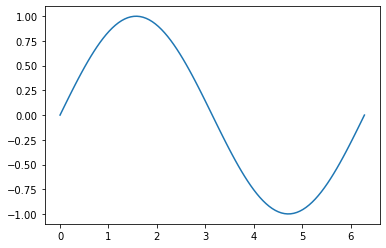

In [40]:
x = torch.linspace(0, 2*torch.pi, 100)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy())

One important fact to keep in mind is that pytorch distinguishes between 2 types of tensors, float tensors and long tensors. Float tensors are tensors meant to store floating point values, while long tensors are meant to store integer values. In many cases it doesn't make a difference which type of tensor your use, but sometimes it does (e.g. when passing tensors through pytorch neural net layers or loss functions).

We can explicitly cast a tensor as float or long using the `float` and `long` methods respectively. If you don't explicitly cast, pytorch will try to infer which way to cast the tensor by how the numbers are written. Roughly speaking, if none of your numbers use a decimal point, the tensor will be encoded as long. If any of them use a decimal point, it will be encoded as float. Most often you'll want a tensor encoded as float, in which case you'll either want to cast it explicitly using `float`, or make sure your numbers contain decimal points, e.g. by typing `0.` instead of `0` for a number.

In [47]:
x = [1, 2, 3, 4]
x_float = torch.tensor(x).float()
x_long = torch.tensor(x).long()
x_float, x_long

(tensor([1., 2., 3., 4.]), tensor([1, 2, 3, 4]))

In [48]:
torch.tensor([1, 2, 3, 4]) # autocast as long tensor since no decimal points

tensor([1, 2, 3, 4])

In [49]:
torch.tensor([1., 2., 3., 4.]) # autocast as float tensor since decimal points

tensor([1., 2., 3., 4.])

## Autodifferentiation

One major feature pytorch has that numpy doesn't is autodifferentiation. Essentially, this means that for pretty much any tensor, pytorch can automatically compute its derivative for you in a stable, computationally efficient way. While this might seem like a neat nice to have, it's actually crucial for deep learning since the fundamental learning algorithm (backpropagation) is essentially just using autodifferentiation on the parameters of a neural network to calculate their gradients.

In pytorch lingo, the derivatives of a function (or tensor) are called **gradients**, or grads for short. By default, a standard pytorch tensor *will not* calculate the gradients for you unless you manually specify that you want it to. Usually the easiest way to tell pytorch that you want to record the gradients is to pass `requires_grad=True` as an argument to the input, i.e. the *independent variable*. To actually *calculate* the gradients, you're still not done. You have to build the computational graph, and then call `out.backwards()` on the output `out`, which *must* be a scalar.

Here's an example. Suppose you want to calculate the derivative of $y=\sin(x)$ numerically. 
1. First, you define a grid of `x` values using, e.g., `torch.linspace`, being sure to pass to it `requires_grad=True`. 
2. Then you calculate the array `y=torch.sin(x)`. Since `y` won't be a scalar (but rather a 1D tensor), you can't calculate the gradients directly from `y`. 
3. The hack around this is to define `out = y.sum()` to get a scalar, and *then* call `out.backwards()`. 
4. This will store the gradient values (i.e. the derivatives) in the *inputs* `x` under `x.grad`. That is, `dydx = x.grad`.

**Note:** When you want to convert a tensor with autodiff turned on, i.e. with `requires_grad=True`, to numpy, you first have to call the `detach` method on it, which tells pytorch to turn autodiff off and treat it as an ordinary tensor again.

In [85]:
x = torch.linspace(0, 2*torch.pi, 50, requires_grad=True)
y = torch.sin(x)
out = y.sum()
x, y, out

(tensor([0.0000, 0.1282, 0.2565, 0.3847, 0.5129, 0.6411, 0.7694, 0.8976, 1.0258,
         1.1541, 1.2823, 1.4105, 1.5387, 1.6670, 1.7952, 1.9234, 2.0517, 2.1799,
         2.3081, 2.4363, 2.5646, 2.6928, 2.8210, 2.9493, 3.0775, 3.2057, 3.3339,
         3.4622, 3.5904, 3.7186, 3.8468, 3.9751, 4.1033, 4.2315, 4.3598, 4.4880,
         4.6162, 4.7444, 4.8727, 5.0009, 5.1291, 5.2574, 5.3856, 5.5138, 5.6420,
         5.7703, 5.8985, 6.0267, 6.1550, 6.2832], requires_grad=True),
 tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
          5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
          9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
          9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
          5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
         -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4554e-01,
         -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
      

In [86]:
out.backward()
dydx = x.grad

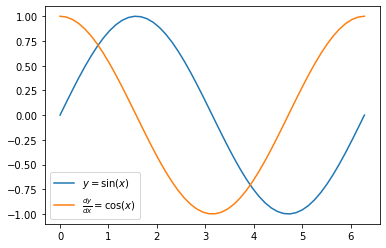

In [87]:
plt.plot(x.detach().numpy(), y.detach().numpy(), label='$y=\sin(x)$')
plt.plot(x.detach().numpy(), dydx.detach().numpy(), label='$\\frac{dy}{dx}=\cos(x)$')
plt.legend()
plt.show()

This works for partial derivatives too, where you can have multiple independent variables. For example, consider the bivariate function $z = x^3 - y^3$. We can calculate the partial derivatives $\frac{\partial z}{\partial x}=3x^2$, $\frac{\partial z}{\partial y}=-3y^2$ in a similar way. The relevant gradients will then be `dzdx = x.grad` and `dzdy = y.grad`.

In [107]:
x = torch.linspace(-5, 5, 50, requires_grad=True)
y = torch.linspace(-5, 5, 50, requires_grad=True)
xx, yy = torch.meshgrid(x, y, indexing='ij')
z = xx**3 - yy**3
out = z.sum()
xx.shape, yy.shape, z.shape, out

(torch.Size([50, 50]),
 torch.Size([50, 50]),
 torch.Size([50, 50]),
 tensor(-0.0003, grad_fn=<SumBackward0>))

In [108]:
out.backward()
dzdx = x.grad
dzdy = y.grad
dzdx.shape, dzdy.shape

(torch.Size([50]), torch.Size([50]))

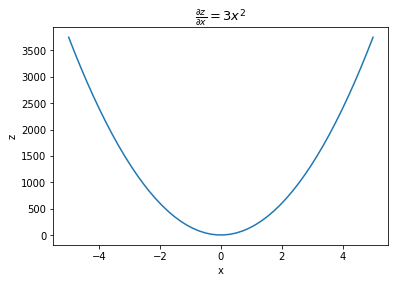

In [111]:
plt.plot(x.detach().numpy(), dzdx.detach().numpy())
plt.xlabel('x')
plt.ylabel('z')
plt.title('$\\frac{\partial z}{\partial x}=3x^2$', fontsize=13)
plt.show()

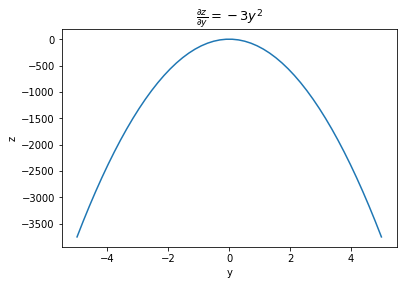

In [112]:
plt.plot(y.detach().numpy(), dzdy.detach().numpy())
plt.xlabel('y')
plt.ylabel('z')
plt.title('$\\frac{\partial z}{\partial y}=-3y^2$', fontsize=13)
plt.show()

In deep learning we will *always* be dealing with *highly* multivariate functions of millions or billions of variables (the parameters of the neural network). The main difference is that we'll always have a scalar *loss function* to call `backward` on instead of a made up sum function like above. Here's a simple example of what such a calculation might look like. Here, the parameters `W` are what we want to calculate the gradients `dlossdW` of. The *data* `x` and `y` are assumed given and unchanging, hence we don't want their gradients. The loss function defined is the *mean squared loss*, used typically for regression tasks. We'll see all this in more detail when we get to neural networks in a future tutorial.

In [120]:
x = torch.linspace(0, 10, 100).reshape(-1, 1)
y = torch.rand(20).reshape(-1, 1)
W = torch.rand(20, 100, requires_grad=True)
yhat = W @ x
loss = torch.mean((y - yhat)**2)
loss.backward()
dlossdW = W.grad
W.shape, dlossdW.shape

(torch.Size([20, 100]), torch.Size([20, 100]))

## GPUs and Cuda

Roughly speaking, the power of frameworks like pytorch boil down to two things: autodifferentiation, and the ability to run computations easily on the GPU. It's no exaggeration to say that the rise of deep learning happened when it did *because* of NVIDIA's release of Cuda, a framework that allows people to do large scale numerical computations on the GPU. For the types of heavy linear algebra computations done in deep learning, GPUs are much better optimized than CPUs, with GPU computations often running 100x to 1000x faster than they would on even the best CPU. Nowadays, it's generally a *must* to have a GPU and know how to use it when doing any kind of deep learning.

Pytorch allows computations to run on the GPU simply by moving the relevant tensors over to the GPU using the `cuda` method, or equivalently `to('cuda')`. For this to work, you must
1. Have a [Cuda-enabled GPU](https://developer.nvidia.com/cuda-gpus). Typically this means having a modern NVIDIA GPU.
2. Have Cuda drivers [installed](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html) on your system and working.
3. Have a [Cuda-enabled version](https://pytorch.org/get-started/locally/) of pytorch installed on your system.

If you don't meet all of these requirements, cuda will not work on your system, and pytorch will likely always default to using the CPU for computations.